In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate as interp
import pickle
import os

In [2]:
import pandas as pd

In [3]:
PROJECT_PATH = "../" 
PARAMS_PATH  = os.path.join(PROJECT_PATH,'params')

In [5]:
params = pickle.load(open(os.path.join(PARAMS_PATH,'parameter_search_2.pkl'),'rb'))

In [6]:
df_sample = pd.DataFrame.from_dict(params)

In [7]:

df_sample

,nvp_depth,num_nsf,num_nvp,scale,learningrate_1,learningrate_2,batchsize_1,batchsize_2,noise,nvp_vloss,nvp_tloss,nbins,num_layers_bins,num_layers_slope
0,10,1,3,3.937708,0.001,0.001,32,32,0.0,"[42.241295, 10.779238, 7.660332, 6.4092875, 5....","[42.327152, 11.020506, 8.10231, 6.3772206, 5.0...",37,1,1
1,15,3,8,4.352034,0.001,0.001,32,32,0.0,"[42.967407, 10.931497, 7.4963436, 6.080964, 4....","[43.258892, 11.542784, 7.7584004, 6.708452, 4....",32,0,1
2,18,2,7,4.427980,0.001,0.001,32,32,0.0,"[46.59179, 13.15006, 8.353138, 6.543511, 5.384...","[46.67566, 14.098062, 9.396842, 6.7740874, 4.9...",26,0,1
3,10,2,1,4.296191,0.001,0.001,32,32,0.0,"[41.774174, 13.463439, 10.708561, 9.428553, 8....","[41.81338, 13.408532, 11.112705, 9.9601965, 8....",42,1,1
4,9,3,9,4.178153,0.001,0.001,32,32,0.0,"[41.739635, 9.65772, 7.52045, 5.933984, 4.7745...","[41.89113, 9.341336, 7.2300954, 6.6849236, 5.7...",19,1,1
5,17,0,0,3.133083,0.001,0.001,32,32,0.0,"[43.748695, 14.192963, 11.366892, 9.6807, 8.58...","[44.122334, 15.132144, 10.557066, 10.006165, 8...",18,0,0
6,21,4,6,4.318468,0.001,0.001,32,32,0.0,"[44.842606, 13.916009, 8.956221, 6.6188517, 5....","[44.777718, 14.197361, 9.592931, 6.9811068, 6....",33,0,1
7,22,2,1,2.950180,0.001,0.001,32,32,0.0,"[50.97984, 14.996581, 12.268175, 10.911734, 9....","[50.95905, 14.78907, 13.897933, 11.861539, 9.9...",47,1,1
8,14,4,6,3.290763,0.001,0.001,32,32,0.0,"[42.38045, 10.262335, 7.6728907, 6.003979, 5.0...","[42.582504, 10.206031, 7.2406373, 6.853075, 4....",37,1,0
9,14,1,3,3.534189,0.001,0.001,32,32,0.0,"[44.617733, 11.903991, 8.065592, 5.6492767, 5....","[45.175743, 12.981603, 8.427348, 5.2835464, 5....",25,1,1


In [9]:
df_sample['final_err'] = np.zeros(27)
df_sample['min_err'] = np.zeros(27)
df_sample['final_deriv'] = np.zeros(27)
df_sample['avg_deriv'] = np.zeros(27)

In [10]:
df = df_sample

In [11]:
df['nvp_vloss'][19].shape

(150,)

(-5, 0)

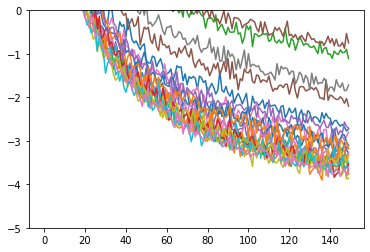

In [13]:
# use minimum between minimum and curent value+mean(deriv)*delta_step (delta_step=50000)?
for ii in range(27):
    num    = len(df['nvp_vloss'][ii])
    #print(num)
    splrep = interp.splrep(np.arange(num), df['nvp_vloss'][ii])
    plt.plot(np.arange(num),interp.splev(np.arange(num),splrep))
    #plt.plot(np.arange(num),df['nvp_vloss'][ii],ls='--', marker='',label='%d'%ii)
    deriv   = interp.splev(np.arange(num),splrep,der=1)
    minimum = min(interp.splev(np.arange(num),splrep))
    df_sample.at[ii,'final_err']   = interp.splev(np.arange(num),splrep)[num-1]
    df_sample.at[ii,'min_err']     = minimum
    df_sample.at[ii,'final_deriv'] = deriv[num-1]
    df_sample.at[ii,'avg_deriv']   = np.mean(deriv[num-20:num-1])
    #plt.axvline(num-10000)
#plt.legend(loc='upper right')
plt.ylim(-5,0)

In [18]:
regressor = df_sample[0:14]

In [14]:
regressor = df_sample

In [15]:
df.columns

Index(['nvp_depth', 'num_nsf', 'num_nvp', 'scale', 'learningrate_1',
       'learningrate_2', 'batchsize_1', 'batchsize_2', 'noise', 'nvp_vloss',
       'nvp_tloss', 'nbins', 'num_layers_bins', 'num_layers_slope',
       'final_err', 'min_err', 'final_deriv', 'avg_deriv'],
      dtype='object')

In [63]:
x = regressor[['nvp_depth', 'num_nsf', 'num_nvp', 'scale','nbins']]#, 'final_err','min_err', 'final_deriv', 'avg_deriv']]

In [64]:
x = x.to_numpy()

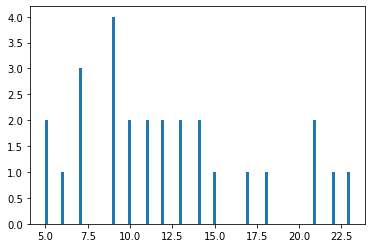

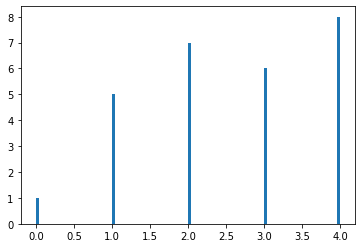

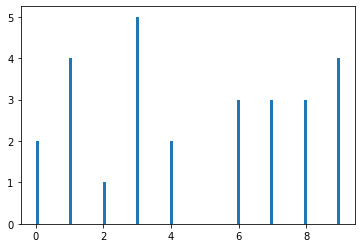

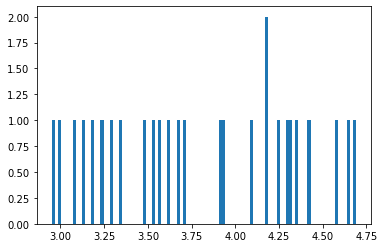

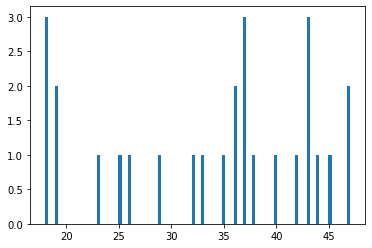

In [65]:
for ii in range(5):
    _ = plt.hist(x[:,ii], bins=100)
    plt.show()

In [66]:
x[np.where(x==0)]=1e-5

In [67]:
x = np.log(x)

In [68]:
x.shape

(27, 5)

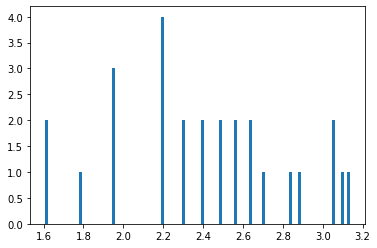

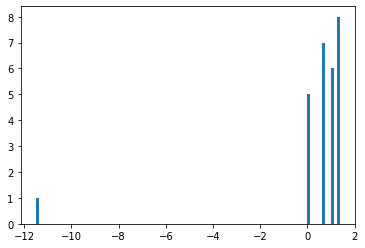

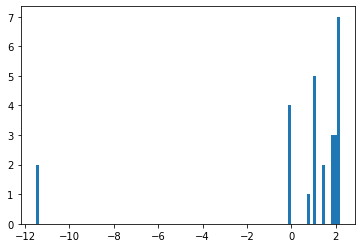

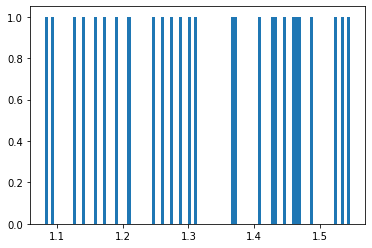

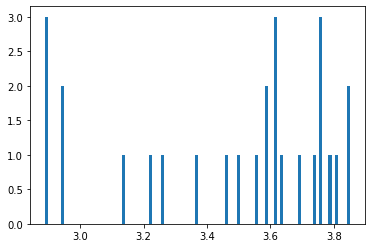

In [69]:
for ii in range(5):
    _ = plt.hist(x[:,ii], bins=100)
    plt.show()

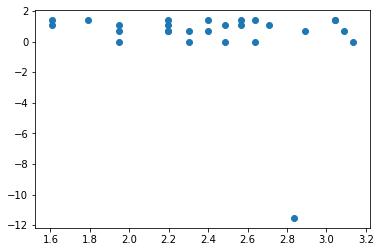

In [70]:
plt.scatter(x[:,0],x[:,1])#,c=y)

In [102]:
#y = #, 'final_err','min_err', 'final_deriv', 'avg_deriv']]

In [71]:
y = regressor[['final_err']].to_numpy()+100*regressor[['avg_deriv']].to_numpy()

In [72]:
#y = np.log(y)
y

array([[-5.26826601],
       [-5.50721361],
       [-3.22260742],
       [-1.37588382],
       [-2.80904793],
       [ 1.33837263],
       [-4.62850355],
       [ 2.72867537],
       [-6.19272312],
       [-3.16873346],
       [-5.48916607],
       [-4.78451171],
       [-0.08571448],
       [-4.95173075],
       [ 0.82401024],
       [-3.19801929],
       [-3.75560763],
       [-1.64856162],
       [-3.7452794 ],
       [-4.84641022],
       [-4.27767358],
       [-3.51970384],
       [-1.72704634],
       [ 2.13790567],
       [-3.90722675],
       [-0.29545811],
       [-4.82094101]])

In [76]:

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C


kernel = C(1.0, (1e-3, 1e3)) * RBF(1, (1e-3, 1e3))
#Instanciate a Gaussian Process model
gp     = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100)
print(gp)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=100, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)


In [77]:
# fit on averages of full rescaled set
gp.fit(x,y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=100, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [78]:
gp.predict([[ 2.30258509,   0.        ,   1.09861229,   1.3705988 ,  3.61091791  ]])

array([[-5.26826601]])

In [28]:
np.hstack(([[40]],[[1,2,3]]))

array([[40,  1,  2,  3]])

In [29]:
from scipy.optimize import minimize

In [84]:
res = minimize(fun= lambda x: gp.predict([x]), x0=res['x'], method='Nelder-Mead')

In [85]:
np.exp(res['x']), res['fun'], res['success']

(array([14.46087809,  3.42106351,  4.3051357 ,  3.14458116, 32.55357034]),
 -9.507035743017699,
 True)

In [81]:
np.exp(res['x']), res['fun'], res['success']

(array([ 8.80175542,  1.73074756,  0.83404078,  4.59890844, 39.85449701]),
 -1.7248240648993745,
 True)

In [82]:
res = minimize(fun= lambda x: gp.predict([x]), x0=[2,0,0,1,3], method='COBYLA')

In [83]:
np.exp(res['x']), res['fun'], res['success']

(array([14.4608301 ,  3.4207876 ,  4.30516538,  3.14459554, 32.55572568]),
 -9.507035742049155,
 True)

In [90]:
res = minimize(fun= lambda x: gp.predict([x]), x0=[3,1,3,1,3], method='COBYLA')

In [91]:
np.exp(res['x']), res['fun'], res['success']

(array([14.46061257,  3.42124583,  4.30514069,  3.14478408, 32.55498715]),
 -9.507035713898391,
 True)

In [ ]:
'nvp_depth', 'num_nsf', 'num_nvp', 'scale','nbins'